In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

import scipy.io as sio
import os
import numpy as np
import pandas as pd
import matplotlib as plt
import fastai
from fastai.conv_learner import *
from fastai.column_data import *
from torch.utils.data import *
import visdom as vis
import scipy.stats
import pickle

C:\Users\Zymieth\Anaconda3\envs\deeplearning\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [3]:
torch.cuda.get_device_name(0)

'GeForce GTX 1060 3GB'

## PAC-Adaptive Sampling implementation

#### Michael Poli M.S, KAIST

### Utils

In [4]:
def pred_accuracy(m, x_val, y_val, ndata):
    x_val, indx = torch.max(m(x_val).cuda(),1)
    return (ndata - torch.nonzero((indx - y_val)).size(0))/ndata

In [5]:
def pickle_to_file(data, filename, PATH = 'L:/vibnet-hankooktire/'):
    with open(filename, 'wb') as handle:
        pickle.dump(data, handle)
def file_to_pickle(filename, PATH = 'L:/vibnet-hankooktire/'):
    with open(filename, 'rb') as handle:
        return pickle.load(handle)        

## Data preprocessing and loading

In [60]:
PATH = 'L:/vibnet-hankooktire/CWRUdata/baseline/'

baselinedata = sio.loadmat(f'{PATH}'+'97', mdict=None, appendmat=True)

print(baselinedata)

def readFromFolder(PATH):
    
    list_of_data = []
    for file in os.listdir(PATH):
        x = sio.loadmat(f'{PATH}'+ file, appendmat=True)
        list_of_data.append(x)
    return list_of_data

## reading from folders
PATH = 'L:/vibnet-hankooktire/CWRUdata/baseline/'
baselined = readFromFolder(PATH)
PATH = 'L:/vibnet-hankooktire/CWRUdata/ball/' 
balld = readFromFolder(PATH)
PATH = 'L:/vibnet-hankooktire/CWRUdata/inner_race/'
iraced = readFromFolder(PATH)
PATH = 'L:/vibnet-hankooktire/CWRUdata/outer_race/'
oraced = readFromFolder(PATH)


baseDE = np.array(baselined[0]['X100_DE_time'])
baseDE = np.append(baseDE, baselined[1]['X097_DE_time'])
baseDE = np.append(baseDE, baselined[2]['X098_DE_time'])
baseDE = np.append(baseDE, baselined[3]['X099_DE_time'])

ballDE = np.array(balld[0]['X118_DE_time'])
ballDE = np.append(ballDE, balld[1]['X119_DE_time'])
ballDE = np.append(ballDE, balld[2]['X120_DE_time'])
ballDE = np.append(ballDE, balld[3]['X121_DE_time'])
ballDE = np.append(ballDE, balld[4]['X185_DE_time'])
ballDE = np.append(ballDE, balld[5]['X186_DE_time'])
ballDE = np.append(ballDE, balld[6]['X187_DE_time'])
ballDE = np.append(ballDE, balld[7]['X188_DE_time'])
ballDE = np.append(ballDE, balld[8]['X222_DE_time'])
ballDE = np.append(ballDE, balld[9]['X223_DE_time'])
ballDE = np.append(ballDE, balld[10]['X224_DE_time'])
ballDE = np.append(ballDE, balld[11]['X225_DE_time'])

oraceDE = np.array(oraced[0]['X130_DE_time'])
oraceDE = np.append(oraceDE, oraced[1]['X131_DE_time'])
oraceDE = np.append(oraceDE, oraced[2]['X132_DE_time'])
#oraceDE = np.append(oraceDE, oraced[3]['X133_DE_time'])
#oraceDE = np.append(oraceDE, oraced[4]['X144_DE_time'])
oraceDE = np.append(oraceDE, oraced[5]['X145_DE_time'])
#oraceDE = np.append(oraceDE, oraced[6]['X146_DE_time'])
#oraceDE = np.append(oraceDE, oraced[7]['X147_DE_time'])
oraceDE = np.append(oraceDE, oraced[8]['X156_DE_time'])
#oraceDE = np.append(oraceDE, oraced[9]['X158_DE_time'])
#oraceDE = np.append(oraceDE, oraced[10]['X159_DE_time'])
oraceDE = np.append(oraceDE, oraced[11]['X160_DE_time'])
#oraceDE = np.append(oraceDE, oraced[12]['X197_DE_time'])
#oraceDE = np.append(oraceDE, oraced[13]['X198_DE_time'])
oraceDE = np.append(oraceDE, oraced[14]['X199_DE_time'])
#oraceDE = np.append(oraceDE, oraced[15]['X200_DE_time'])
#oraceDE = np.append(oraceDE, oraced[16]['X234_DE_time'])
oraceDE = np.append(oraceDE, oraced[17]['X235_DE_time'])
#oraceDE = np.append(oraceDE, oraced[18]['X236_DE_time'])
oraceDE = np.append(oraceDE, oraced[19]['X237_DE_time'])
oraceDE = np.append(oraceDE, oraced[20]['X246_DE_time'])
#oraceDE = np.append(oraceDE, oraced[21]['X247_DE_time'])
#oraceDE = np.append(oraceDE, oraced[22]['X248_DE_time'])
oraceDE = np.append(oraceDE, oraced[23]['X249_DE_time'])
#oraceDE = np.append(oraceDE, oraced[24]['X258_DE_time'])
#oraceDE = np.append(oraceDE, oraced[25]['X259_DE_time'])
oraceDE = np.append(oraceDE, oraced[26]['X260_DE_time'])
#oraceDE = np.append(oraceDE, oraced[27]['X261_DE_time']

iraceDE = np.array(iraced[0]['X105_DE_time'])
iraceDE = np.append(iraceDE, iraced[1]['X106_DE_time'])
iraceDE = np.append(iraceDE, iraced[2]['X107_DE_time'])
iraceDE = np.append(iraceDE, iraced[3]['X108_DE_time'])
iraceDE = np.append(iraceDE, iraced[4]['X169_DE_time'])
iraceDE = np.append(iraceDE, iraced[5]['X170_DE_time'])
iraceDE = np.append(iraceDE, iraced[6]['X171_DE_time'])
iraceDE = np.append(iraceDE, iraced[7]['X172_DE_time'])
iraceDE = np.append(iraceDE, iraced[8]['X209_DE_time'])
iraceDE = np.append(iraceDE, iraced[9]['X210_DE_time'])
iraceDE = np.append(iraceDE, iraced[10]['X211_DE_time'])
iraceDE = np.append(iraceDE, iraced[11]['X212_DE_time'])


# Preparing pd.DataFrame for data labelled 0 (no fault)

n_samples = int(np.floor((len(baseDE))/(0.25*8192)))
n_samples

base_train = np.empty((829,2048), dtype = float)

for i in range(n_samples-1):
    base_train[i] = baseDE[i*2048:(i+1)*2048]

y = np.zeros((1,829),dtype=int)

basedf = pd.DataFrame(data=base_train)

basedf[2048] = y.squeeze(0)

# Preparing pd.DataFrame for data labelled 1 (ball fault)

n_samples = int(np.floor((len(ballDE))/(0.25*8192)))
n_samples

ball_train = np.empty((714,2048), dtype = float)

for i in range(n_samples-1):
    ball_train[i] = ballDE[i*2048:(i+1)*2048]
    
y = np.ones((1,714),dtype=int)

balldf = pd.DataFrame(data=ball_train)
balldf[2048] = y.squeeze(0)

# Preparing pd.DataFrame for data labelled 2 (inner race fault)

n_samples = int(np.floor((len(iraceDE))/(0.25*8192)))
#n_samples = 714

irace_train = np.empty((714,2048), dtype = float)

for i in range(n_samples-1):
    irace_train[i] = iraceDE[i*2048:(i+1)*2048]
    
y = np.full((1,714), 2, dtype=int)

iracedf = pd.DataFrame(data=irace_train)
iracedf[2048] = y.squeeze(0)

# Preparing pd.DataFrame for data labelled 3 (outer race fault)

n_samples = int(np.floor((len(oraceDE))/(0.25*8192)))
#n_samples = 714

orace_train = np.empty((714,2048), dtype = float)

for i in range(n_samples-1):
    orace_train[i] = oraceDE[i*2048:(i+1)*2048]
    
y = np.full((1,714), 3, dtype=int)

oracedf = pd.DataFrame(data=orace_train)
oracedf[2048] = y.squeeze(0)

# Random uniform sampling, 70% train 30% valid/test

baseline_input = basedf.sample(frac=0.7, random_state=1)
ball_input = balldf.sample(frac=0.7, random_state=1)
irace_input = iracedf.sample(frac=0.7, random_state=1)
orace_input = oracedf.sample(frac=0.7, random_state=1)

baseline_valid = basedf.drop(baseline_input.index)
ball_valid = balldf.drop(ball_input.index)
irace_valid = iracedf.drop(irace_input.index)
orace_valid = oracedf.drop(orace_input.index)

concatdf = [baseline_input, ball_input, irace_input, orace_input]
concatdf_valid = [baseline_valid, ball_valid, irace_valid, orace_valid]
x = pd.concat(concatdf)
x_val = pd.concat(concatdf_valid)

y = x[2048]
y_val = x_val[2048]

x.drop(x.columns[len(x.columns)-1], axis=1, inplace=True)
x_val.drop(x_val.columns[len(x_val.columns)-1], axis=1, inplace=True)

# Data massaging for PyTorch DataLoaders

#using float so we don't run into float vs double inconsistencies during training
x = torch.from_numpy(np.array(x)).float().cuda()
x_val = torch.from_numpy(np.array(x_val)).float().cuda()
y = torch.from_numpy(np.array(y)).long().cuda()
y_val = torch.from_numpy(np.array(y_val)).long().cuda()

train = TensorDataset(x, y)
val = TensorDataset(x_val, y_val)

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN, Created on: Mon Jan 31 15:28:20 2000', '__version__': '1.0', '__globals__': [], 'X097_DE_time': array([[ 0.0532 ],
       [ 0.08866],
       [ 0.09972],
       ...,
       [-0.03463],
       [ 0.01669],
       [ 0.04694]]), 'X097_FE_time': array([[0.14567],
       [0.0978 ],
       [0.05486],
       ...,
       [0.14053],
       [0.09554],
       [0.09019]]), 'X097RPM': array([[1796]], dtype=uint16)}


In [88]:
class CWRU(Dataset):
    '''
    Wrapper for CWRU dataset. Iter method returns x, y and index of sampled row
    '''
    def __init__(self, x, y):
        self.tdset = TensorDataset(x, y)
        self.len = x.size(0)
        
    def __getitem__(self, index):
        data, target = self.tdset[index]      
        return data, target, index
    
    def __len__(self):
        return self.len
    
dataset = CWRU(x, y)
trainloader = DataLoader(dataset,
                    batch_size=1,
                    shuffle=True,
                    num_workers=0)

## Model

In [7]:
class CNN(nn.Module):
    def __init__(self, conv_layers, layers):
        super().__init__()
        self.conv_layers = nn.ModuleList([nn.Conv1d(conv_layers[i], conv_layers[i + 1], kernel_size = 3) 
                                     for i in range(len(conv_layers) - 1)])
        self.layers = nn.ModuleList([nn.Linear(layers[i], layers[i + 1]) for i in range(len(layers) - 1)])
        
        self.pool = nn.MaxPool1d(2)
        self.conv_dropout = nn.Dropout(0.25)
        self.l_dropout = nn.Dropout(0.25)
        
    def forward(self, x):
        x = x.view(x.size(0), 1, -1)
        
        for l in self.conv_layers:
            l_x = l(x)
            bn = nn.BatchNorm1d(x.size())
            x = F.relu(l_x)
            #x = self.pool(x)
            #x = self.conv_dropout(x)
        
        x = x.view(x.size(0), -1)
        for l in self.layers:
            l_x = l(x)
            bn = nn.BatchNorm1d(x.size())
            x = F.relu(l_x)
            #x = self.l_dropout(x)
        return F.log_softmax(l_x, dim=-1)

In [8]:
m = CNN([1, 3, 10, 3], [6126, 512, 4]).cuda()

## PAC-Adaptive sampling

In [22]:
def updateSampleWeights(w, idx, tau = 0.25, alpha = 0.5, f):
    '''
    Updates sample weights w assuming example at index idx was drawn. tau indicates decay (assumed 0 to 1), alpha aggressiveness
    of the update. F is the utility function
    '''
    #decaying towards uniform distribution
    w = (w - 1/np.size(w))*math.exp(-tau) + 1/np.size(w)
    
    #calculating actual update
    #check whether we are in epoch 1 or higher number of training epochs. wrap-around
    if idx >= np.size(w):
        w[idx-np.size(w)] = w[idx-np.size(w)] * math.exp(alpha * f)
    else:
        w[idx] = w[idx] * math.exp(alpha * f)
    #normalizing
    w = w/np.sum(w)
    return w     

Decay rule: $$ q_{i} = (q_{i} - \frac{1}{N})*e^{-\tau} + \frac{1}{N} $$

In [ ]:
### Simple test example with 4 weights and random f and index

w = np.array([0.25,0.25,0.25,0.25])
print('Initial uniform weights: ' + str(w) + '\n')
for j in range(10):
    idx = np.random.randint(0,4)
    f = np.random.randint(0,2)
    if f == 0:
        print('The data point at index: ' + str(idx), 'was correctly classified')
    else:
        print('The data point at index: ' + str(idx), 'was incorrectly classified')
    w = updateSampleWeights(w, idx, 0.5, 0.5, f)
    print('New weights: ' + str(w) + '\n')

## Training loop: Unif-samp SGD

In [127]:
m = CNN([1, 3, 10, 3], [6126, 512, 4]).cuda()

trainloader = torch.utils.data.DataLoader(train, batch_size=1, shuffle=True, num_workers=0, sampler=None)
opt = torch.optim.Adam(m.parameters(), weight_decay= 0, lr=0.001)
data_collunif = {'loss':np.zeros(41),'acc':np.zeros(41)}
#scheduler = torch.optim.lr_scheduler.StepLR(opt,5,0.95)
experiment_collection1 = {}

for experiment in range(10):
    #create new model and optimizer per trial
    m = CNN([1, 3, 10, 3], [6126, 512, 4]).cuda()
    opt = torch.optim.Adam(m.parameters(), weight_decay= 0, lr=0.001)
    data_collunif = {'loss':np.zeros(41),'acc':np.zeros(41)}
    
    for epoch in range(2): 

        running_acc = 0.0
        running_loss = 0.0

        for i, data in enumerate(trainloader, 0):        
        
            inputs, labels = data
            #inputs, labels = inputs.to(device), labels.to(device)

            opt.zero_grad()

            outputs = m(inputs)
            loss = F.nll_loss(outputs, labels) 
            loss.backward()
            opt.step()

            running_loss += loss.item()

            if (i % 100 == 0) and (i != 0):
                running_acc = pred_accuracy(m, x_val, y_val, x_val.size(0))
                
                j = int(i/100)
                data_collunif['acc'][j+20*epoch] = running_acc

            if (i % 100 == 0) and (i != 0):   
                print('[%d, %5d] loss: %.3f acc: %.3f' %
                      (epoch, i , running_loss/ 100, running_acc))

                j = int(i/100)
                data_collunif['loss'][j+20*epoch] = running_loss/100
                running_loss = 0.0
                
    experiment_collection1[experiment] = data_collunif
    pickle_to_file(experiment_collection1, 'experimentsUNIF.pickle')

[0,   100] loss: 1.457 acc: 0.279
[0,   200] loss: 1.364 acc: 0.434
[0,   300] loss: 1.125 acc: 0.522
[0,   400] loss: 1.053 acc: 0.724
[0,   500] loss: 0.867 acc: 0.612
[0,   600] loss: 0.972 acc: 0.597
[0,   700] loss: 0.941 acc: 0.551
[0,   800] loss: 0.842 acc: 0.880
[0,   900] loss: 0.666 acc: 0.687
[0,  1000] loss: 0.641 acc: 0.805
[0,  1100] loss: 0.714 acc: 0.829
[0,  1200] loss: 0.676 acc: 0.802
[0,  1300] loss: 0.489 acc: 0.842
[0,  1400] loss: 0.440 acc: 0.887
[0,  1500] loss: 0.395 acc: 0.887
[0,  1600] loss: 0.371 acc: 0.891
[0,  1700] loss: 0.344 acc: 0.836
[0,  1800] loss: 0.966 acc: 0.698
[0,  1900] loss: 0.367 acc: 0.829
[0,  2000] loss: 0.322 acc: 0.906
[1,   100] loss: 0.193 acc: 0.892
[1,   200] loss: 0.382 acc: 0.896
[1,   300] loss: 0.376 acc: 0.917
[1,   400] loss: 0.192 acc: 0.898
[1,   500] loss: 0.141 acc: 0.916
[1,   600] loss: 0.313 acc: 0.916
[1,   700] loss: 0.429 acc: 0.861
[1,   800] loss: 0.233 acc: 0.944
[1,   900] loss: 0.128 acc: 0.934
[1,  1000] los

[0,   100] loss: 1.463 acc: 0.240
[0,   200] loss: 1.282 acc: 0.432
[0,   300] loss: 0.966 acc: 0.494
[0,   400] loss: 0.918 acc: 0.571
[0,   500] loss: 0.893 acc: 0.599
[0,   600] loss: 0.816 acc: 0.607
[0,   700] loss: 0.871 acc: 0.534
[0,   800] loss: 0.974 acc: 0.657
[0,   900] loss: 0.714 acc: 0.673
[0,  1000] loss: 0.834 acc: 0.676
[0,  1100] loss: 0.832 acc: 0.712
[0,  1200] loss: 0.803 acc: 0.712
[0,  1300] loss: 0.611 acc: 0.730
[0,  1400] loss: 0.634 acc: 0.722
[0,  1500] loss: 0.684 acc: 0.743
[0,  1600] loss: 0.622 acc: 0.820
[0,  1700] loss: 0.699 acc: 0.743
[0,  1800] loss: 0.430 acc: 0.862
[0,  1900] loss: 0.591 acc: 0.817
[0,  2000] loss: 0.473 acc: 0.786
[1,   100] loss: 0.279 acc: 0.895
[1,   200] loss: 0.223 acc: 0.890
[1,   300] loss: 0.328 acc: 0.923
[1,   400] loss: 0.252 acc: 0.906
[1,   500] loss: 0.349 acc: 0.898
[1,   600] loss: 0.305 acc: 0.886
[1,   700] loss: 0.248 acc: 0.916
[1,   800] loss: 0.221 acc: 0.928
[1,   900] loss: 0.244 acc: 0.935
[1,  1000] los

##### Some example graphs from last run of the experiment (no averaging)

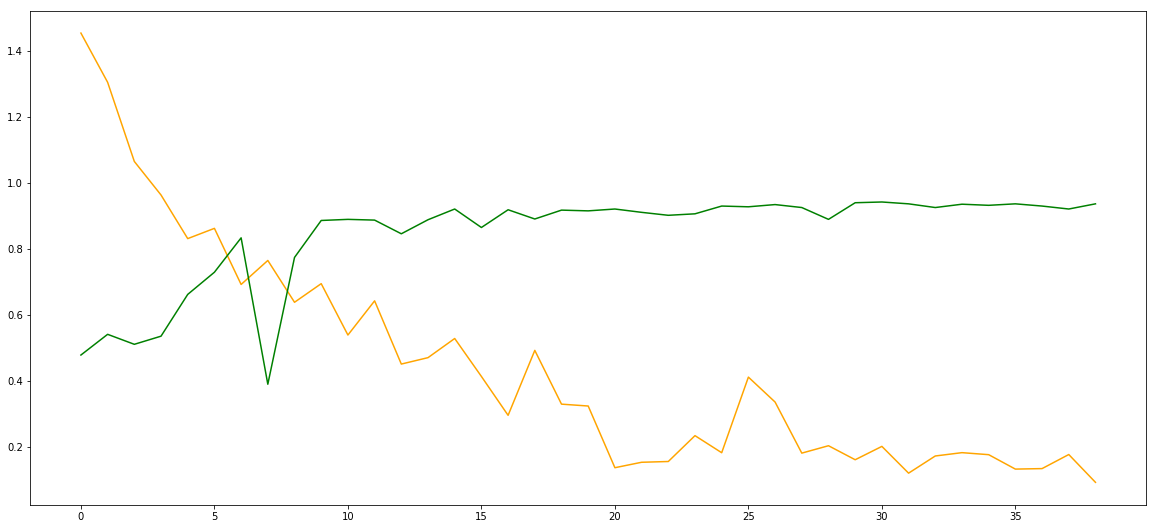

In [68]:
fig = plt.figure(figsize=(20,20), facecolor = 'white')
fig.add_subplot(2,1,1)
plt.plot(data_collunif['loss'][1:40], color='orange')
plt.plot(data_collunif['acc'][1:40], color='green')

## Training loop: AdaSamp SGD (0-1 utility)

### How many training examples?

In [19]:
x.shape

torch.Size([2080, 2048])

2080 time-series of 2048 points

In [162]:
w_unif = np.full((2048), 1/2048)

In [163]:
tau = 0.25
alpha = 0.5
data_coll = {'loss':np.zeros(41),'kl':np.zeros(41),'acc':np.zeros(41)}
experiment_collection2 = {}

for experiment in range(10):
    #create new model, optimizer and sampler per trial
    m = CNN([1, 3, 10, 3], [6126, 512, 4]).cuda()
    opt = torch.optim.Adam(m.parameters(), weight_decay= 0, lr=0.001)
    w = np.full((2048), 1/2048)
    samp = torch.utils.data.WeightedRandomSampler(torch.Tensor(w).cuda(), 4000)
    trainloader = torch.utils.data.DataLoader(dataset, batch_size=1, shuffle=False, num_workers=0, sampler=samp)
    data_coll = {'loss':np.zeros(41),'kl':np.zeros(41),'acc':np.zeros(41)}
    
    for epoch in range(1): 
        
        running_acc = 0.0
        running_loss = 0.0
        running_kl = 0.0
        
        for i, data in enumerate(trainloader, 0):

            inputs, labels, idx = data
            #inputs, labels = inputs.to(device), labels.to(device)
            #scheduler.step()
            opt.zero_grad()

            outputs = m(inputs)
            loss = F.nll_loss(outputs, labels) 
            loss.backward()
            opt.step()

            _ , predicted = torch.max(outputs,1)

            #0-1 utility pred
            if predicted == labels:
                f = 0
            else: 
                f = 1

            running_loss += loss.item()
                       
            if (i % 100 == 0) and (i != 0):
                running_acc = pred_accuracy(m, x_val, y_val, x_val.size(0))
                
                j = int(i/100)
                data_coll['acc'][j] = running_acc
                data_coll['kl'][j] = scipy.stats.entropy(w,w_unif)
            
            
            if (i % 100 == 0) and (i != 0):   
                print('[%d, %5d] loss: %.3f acc: %.3f kl div e(-4): %.3f' %
                      (epoch, i , running_loss / 100, running_acc, running_kl * 1000))

                j = int(i/100)
                data_coll['loss'][j] = running_loss/100

                running_loss = 0.0


            #PAC adaptive sampling
            w = updateSampleWeights(w, idx.cpu().numpy(), tau, alpha, f)
            #update dataloader sampler
            samp.weights = torch.Tensor(w).cuda()
    experiment_collection2[experiment] = data_coll
    pickle_to_file(experiment_collection2, 'AdaSGD.pickle')

[0,   100] loss: 1.496 acc: 0.240 kl div e(-4): 0.000
[0,   200] loss: 1.386 acc: 0.453 kl div e(-4): 0.000
[0,   300] loss: 1.194 acc: 0.504 kl div e(-4): 0.000
[0,   400] loss: 1.014 acc: 0.570 kl div e(-4): 0.000
[0,   500] loss: 0.932 acc: 0.575 kl div e(-4): 0.000
[0,   600] loss: 0.963 acc: 0.617 kl div e(-4): 0.000
[0,   700] loss: 0.752 acc: 0.641 kl div e(-4): 0.000
[0,   800] loss: 0.741 acc: 0.658 kl div e(-4): 0.000
[0,   900] loss: 0.731 acc: 0.655 kl div e(-4): 0.000
[0,  1000] loss: 0.719 acc: 0.616 kl div e(-4): 0.000
[0,  1100] loss: 0.703 acc: 0.682 kl div e(-4): 0.000
[0,  1200] loss: 0.711 acc: 0.605 kl div e(-4): 0.000
[0,  1300] loss: 0.764 acc: 0.604 kl div e(-4): 0.000
[0,  1400] loss: 0.580 acc: 0.698 kl div e(-4): 0.000
[0,  1500] loss: 0.491 acc: 0.886 kl div e(-4): 0.000
[0,  1600] loss: 0.859 acc: 0.727 kl div e(-4): 0.000
[0,  1700] loss: 0.492 acc: 0.886 kl div e(-4): 0.000
[0,  1800] loss: 0.913 acc: 0.589 kl div e(-4): 0.000
[0,  1900] loss: 0.741 acc: 

[0,  3500] loss: 0.071 acc: 0.925 kl div e(-4): 0.000
[0,  3600] loss: 0.069 acc: 0.900 kl div e(-4): 0.000
[0,  3700] loss: 0.238 acc: 0.926 kl div e(-4): 0.000
[0,  3800] loss: 0.089 acc: 0.935 kl div e(-4): 0.000
[0,  3900] loss: 0.218 acc: 0.810 kl div e(-4): 0.000
[0,   100] loss: 1.459 acc: 0.240 kl div e(-4): 0.000
[0,   200] loss: 1.311 acc: 0.465 kl div e(-4): 0.000
[0,   300] loss: 1.078 acc: 0.569 kl div e(-4): 0.000
[0,   400] loss: 0.943 acc: 0.706 kl div e(-4): 0.000
[0,   500] loss: 0.791 acc: 0.687 kl div e(-4): 0.000
[0,   600] loss: 0.633 acc: 0.703 kl div e(-4): 0.000
[0,   700] loss: 0.508 acc: 0.814 kl div e(-4): 0.000
[0,   800] loss: 0.512 acc: 0.841 kl div e(-4): 0.000
[0,   900] loss: 0.296 acc: 0.848 kl div e(-4): 0.000
[0,  1000] loss: 0.406 acc: 0.880 kl div e(-4): 0.000
[0,  1100] loss: 0.446 acc: 0.836 kl div e(-4): 0.000
[0,  1200] loss: 0.340 acc: 0.883 kl div e(-4): 0.000
[0,  1300] loss: 0.264 acc: 0.883 kl div e(-4): 0.000
[0,  1400] loss: 0.414 acc: 

[0,  3000] loss: 0.137 acc: 0.911 kl div e(-4): 0.000
[0,  3100] loss: 0.062 acc: 0.927 kl div e(-4): 0.000
[0,  3200] loss: 0.211 acc: 0.887 kl div e(-4): 0.000
[0,  3300] loss: 0.166 acc: 0.926 kl div e(-4): 0.000
[0,  3400] loss: 0.083 acc: 0.927 kl div e(-4): 0.000
[0,  3500] loss: 0.144 acc: 0.917 kl div e(-4): 0.000
[0,  3600] loss: 0.159 acc: 0.924 kl div e(-4): 0.000
[0,  3700] loss: 0.125 acc: 0.917 kl div e(-4): 0.000
[0,  3800] loss: 0.078 acc: 0.926 kl div e(-4): 0.000
[0,  3900] loss: 0.039 acc: 0.929 kl div e(-4): 0.000
[0,   100] loss: 1.432 acc: 0.240 kl div e(-4): 0.000
[0,   200] loss: 1.406 acc: 0.240 kl div e(-4): 0.000
[0,   300] loss: 1.328 acc: 0.481 kl div e(-4): 0.000
[0,   400] loss: 1.004 acc: 0.530 kl div e(-4): 0.000
[0,   500] loss: 0.939 acc: 0.562 kl div e(-4): 0.000
[0,   600] loss: 0.908 acc: 0.637 kl div e(-4): 0.000
[0,   700] loss: 0.767 acc: 0.698 kl div e(-4): 0.000
[0,   800] loss: 0.690 acc: 0.698 kl div e(-4): 0.000
[0,   900] loss: 0.830 acc: 

##### Some example graphs from last run of the experiment (no averaging)

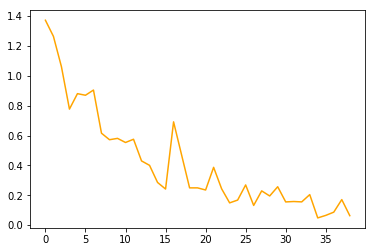

In [97]:
plt.plot(data_coll['loss'][1:40], color='orange')

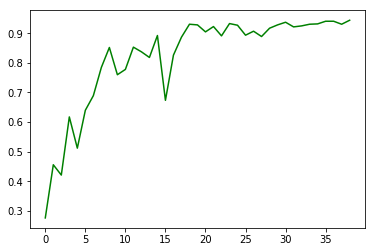

In [98]:
plt.plot(data_coll['acc'][1:40], color='green')

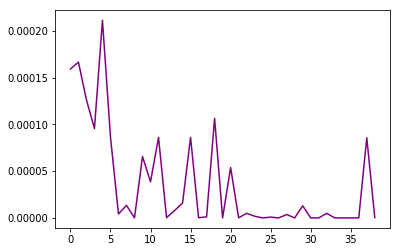

In [99]:
plt.plot(data_coll['kl'][1:40], color='purple')

In [256]:
m = CNN([1, 3, 10, 3], [6126, 512, 4]).cuda()

## Training loop: AdaSamp SGD (L1 utility)

In [40]:
cuda.empty_cache()

In [41]:
opt = torch.optim.Adam(m.parameters(), weight_decay= 0, lr=0.001)
#scheduler = torch.optim.lr_scheduler.StepLR(opt,5,0.5)
w = np.full((2048), 1/2048)
w_unif = np.full((2048), 1/2048)
samp = torch.utils.data.WeightedRandomSampler(torch.Tensor(w).cuda(), 4000)
trainloader = torch.utils.data.DataLoader(train, batch_size=1, shuffle=False, num_workers=0, sampler=samp)

In [241]:
m = CNN([1, 3, 10, 3], [6126, 512, 4]).cuda()

tau = 0.25
alpha = 1
data_collL1 = {'loss':np.zeros(41),'kl':np.zeros(41),'acc':np.zeros(41)}
experiment_collection3 = {}

for experiment in range(10):
    #create new model, optimizer and sampler per trial
    m = CNN([1, 3, 10, 3], [6126, 512, 4]).cuda()
    opt = torch.optim.Adam(m.parameters(), weight_decay= 0, lr=0.001)
    w = np.full((2048), 1/2048)
    samp = torch.utils.data.WeightedRandomSampler(torch.Tensor(w).cuda(), 4000)
    trainloader = torch.utils.data.DataLoader(dataset, batch_size=1, shuffle=False, num_workers=0, sampler=samp)
    data_collL1 = {'loss':np.zeros(41),'kl':np.zeros(41),'acc':np.zeros(41)}
    
    for epoch in range(1): 

        running_acc = 0.0
        running_loss = 0.0
        running_kl = 0.0

        for i, data in enumerate(trainloader, 0):

            inputs, labels, idx = data
            #inputs, labels = inputs.to(device), labels.to(device)
            #scheduler.step()
            opt.zero_grad()

            outputs = m(inputs)
            loss = F.nll_loss(outputs, labels) 
            loss.backward()
            opt.step()

            _ , predicted = torch.max(outputs,1)

            #L1 utility 
            if predicted == labels:
                f = 0
            else: 
                f = labels.float() - torch.exp(outputs[:,labels])

            running_loss += loss.item()
                       
            if (i % 100 == 0) and (i != 0):
                running_acc = pred_accuracy(m, x_val, y_val, x_val.size(0))
                
                j = int(i/100)
                data_collL1['acc'][j] = running_acc
                data_collL1['kl'][j] = scipy.stats.entropy(w,w_unif)
            
            
            if (i % 100 == 0) and (i != 0):   
                print('[%d, %5d] loss: %.3f acc: %.3f kl div: %.3f' %
                      (epoch, i , running_loss / 100, running_acc, running_kl))

                j = int(i/100)
                data_collL1['loss'][j] = running_loss/100

                running_loss = 0.0

            #PAC adaptive sampling
            w = updateSampleWeights(w, idx.cpu().numpy(), tau, alpha, f)
            #update dataloader sampler
            samp.weights = torch.Tensor(w).cuda()
    experiment_collection3[experiment] = data_collL1
    pickle_to_file(experiment_collection3, 'AdaL1.pickle')

[0,   100] loss: 1.520 acc: 0.240 kl div: 0.000
[0,   200] loss: 1.439 acc: 0.240 kl div: 0.000
[0,   300] loss: 1.280 acc: 0.536 kl div: 0.000
[0,   400] loss: 0.925 acc: 0.636 kl div: 0.000
[0,   500] loss: 0.713 acc: 0.687 kl div: 0.000
[0,   600] loss: 0.598 acc: 0.730 kl div: 0.000
[0,   700] loss: 0.501 acc: 0.734 kl div: 0.000
[0,   800] loss: 0.543 acc: 0.781 kl div: 0.000
[0,   900] loss: 0.398 acc: 0.808 kl div: 0.000
[0,  1000] loss: 0.416 acc: 0.823 kl div: 0.000
[0,  1100] loss: 0.328 acc: 0.845 kl div: 0.000
[0,  1200] loss: 0.314 acc: 0.838 kl div: 0.000
[0,  1300] loss: 0.327 acc: 0.829 kl div: 0.000
[0,  1400] loss: 0.188 acc: 0.901 kl div: 0.000
[0,  1500] loss: 0.236 acc: 0.893 kl div: 0.000
[0,  1600] loss: 0.309 acc: 0.848 kl div: 0.000
[0,  1700] loss: 0.343 acc: 0.871 kl div: 0.000
[0,  1800] loss: 0.251 acc: 0.889 kl div: 0.000
[0,  1900] loss: 0.188 acc: 0.910 kl div: 0.000
[0,  2000] loss: 0.276 acc: 0.911 kl div: 0.000
[0,  2100] loss: 0.178 acc: 0.897 kl div

[0,  1500] loss: 0.747 acc: 0.664 kl div: 0.000
[0,  1600] loss: 0.635 acc: 0.740 kl div: 0.000
[0,  1700] loss: 0.460 acc: 0.762 kl div: 0.000
[0,  1800] loss: 0.545 acc: 0.783 kl div: 0.000
[0,  1900] loss: 0.513 acc: 0.816 kl div: 0.000
[0,  2000] loss: 0.291 acc: 0.809 kl div: 0.000
[0,  2100] loss: 0.348 acc: 0.808 kl div: 0.000
[0,  2200] loss: 0.399 acc: 0.792 kl div: 0.000
[0,  2300] loss: 0.337 acc: 0.832 kl div: 0.000
[0,  2400] loss: 0.283 acc: 0.801 kl div: 0.000
[0,  2500] loss: 0.350 acc: 0.863 kl div: 0.000
[0,  2600] loss: 0.282 acc: 0.866 kl div: 0.000
[0,  2700] loss: 0.279 acc: 0.881 kl div: 0.000
[0,  2800] loss: 0.212 acc: 0.864 kl div: 0.000
[0,  2900] loss: 0.188 acc: 0.906 kl div: 0.000
[0,  3000] loss: 0.192 acc: 0.897 kl div: 0.000
[0,  3100] loss: 0.192 acc: 0.829 kl div: 0.000
[0,  3200] loss: 0.078 acc: 0.914 kl div: 0.000
[0,  3300] loss: 0.231 acc: 0.911 kl div: 0.000
[0,  3400] loss: 0.091 acc: 0.923 kl div: 0.000
[0,  3500] loss: 0.186 acc: 0.891 kl div

[0,  2900] loss: 0.150 acc: 0.932 kl div: 0.000
[0,  3000] loss: 0.208 acc: 0.914 kl div: 0.000
[0,  3100] loss: 0.119 acc: 0.899 kl div: 0.000
[0,  3200] loss: 0.148 acc: 0.825 kl div: 0.000
[0,  3300] loss: 0.219 acc: 0.918 kl div: 0.000
[0,  3400] loss: 0.149 acc: 0.920 kl div: 0.000
[0,  3500] loss: 0.198 acc: 0.916 kl div: 0.000
[0,  3600] loss: 0.109 acc: 0.927 kl div: 0.000
[0,  3700] loss: 0.227 acc: 0.911 kl div: 0.000
[0,  3800] loss: 0.143 acc: 0.924 kl div: 0.000
[0,  3900] loss: 0.136 acc: 0.907 kl div: 0.000
[0,   100] loss: 1.377 acc: 0.520 kl div: 0.000
[0,   200] loss: 1.022 acc: 0.515 kl div: 0.000
[0,   300] loss: 0.843 acc: 0.575 kl div: 0.000
[0,   400] loss: 0.877 acc: 0.634 kl div: 0.000
[0,   500] loss: 0.724 acc: 0.654 kl div: 0.000
[0,   600] loss: 0.741 acc: 0.652 kl div: 0.000
[0,   700] loss: 0.654 acc: 0.626 kl div: 0.000
[0,   800] loss: 0.705 acc: 0.728 kl div: 0.000
[0,   900] loss: 0.652 acc: 0.772 kl div: 0.000
[0,  1000] loss: 0.439 acc: 0.808 kl div

#### Example plots

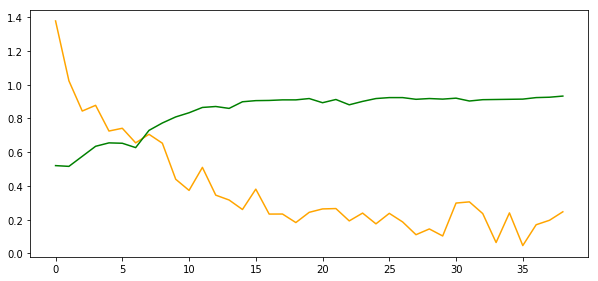

In [242]:
fig = plt.figure(figsize=(10,10), facecolor = 'white')
fig.add_subplot(2,1,1)
plt.plot(data_collL1['loss'][1:40], color='orange')
plt.plot(data_collL1['acc'][1:40], color='green')

## Final plot comparisons (averaged over 10 runs)

For these experiments decay the Adasamp parameters were set as follows:

decay $$\tau = 0.25$$ and aggressiveness of the updates $$\alpha = 0.5 \hspace{0.5cm}\text(01)$$  $$\alpha = 1  \hspace{0.5cm} \text(L1)$$ 

In [62]:
#pickle_to_file(data_collunif, 'unifSGD.pickle')
#pickle_to_file(data_coll, 'AdaSGD01.pickle')
#pickle_to_file(data_collL1, 'AdaSGDL1.pickle')

In [70]:
#with open('unifSGD.pickle', 'rb') as handle:
#    x = pickle.load(handle)

#### Averaging

In [243]:
acc1 = np.zeros(39)
acc2 = np.zeros(39)
acc3 = np.zeros(39)
loss1 = np.zeros(39)
loss2 = np.zeros(39)
loss3 = np.zeros(39)
kl2 = np.zeros(39)
kl3 = np.zeros(39)

In [244]:
for i in range(10):
    loss1 += experiment_collection1[i]['loss'][1:40]
    loss2 += experiment_collection2[i]['loss'][1:40]
    loss3 += experiment_collection3[i]['loss'][1:40]
    acc1 += experiment_collection1[i]['acc'][1:40]
    acc2 += experiment_collection2[i]['acc'][1:40]
    acc3 += experiment_collection3[i]['acc'][1:40]
    kl2 += experiment_collection2[i]['kl'][1:40]
    kl3 += experiment_collection3[i]['kl'][1:40]
loss1 = loss1/10
loss2 = loss2/10
loss3 = loss3/10
acc1 = acc1/10
acc2 = acc2/10
acc3 = acc3/10
kl2 = kl2/10
kl3 = kl3/10

## Test Accuracy

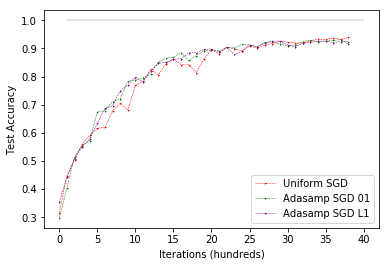

In [245]:
plt.plot(acc1, color='red', marker='+', linestyle='dashed',
        linewidth=0.5, markersize=1)
plt.plot(acc2, color='green', marker='+', linestyle='dashed',
        linewidth=0.5, markersize=1)
plt.plot(acc3, color='purple', marker='+', linestyle='dashed',
        linewidth=0.5, markersize=1)
plt.legend(('Uniform SGD', 'Adasamp SGD 01', 'Adasamp SGD L1', ('label1', 'label2', 'label3')))
plt.xlabel('Iterations (hundreds)')
plt.ylabel('Test Accuracy')
plt.hlines(1,1,40, linestyles='dashed', linewidth=0.3)

## Loss

Text(0,0.5,'Cross Entropy Loss')

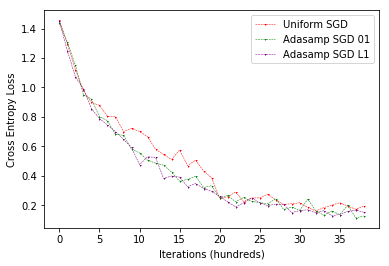

In [246]:
plt.plot(loss1, color='red', marker='+', linestyle='dashed',
        linewidth=0.5, markersize=1)
plt.plot(loss2, color='green', marker='+', linestyle='dashed',
        linewidth=0.5, markersize=1)
plt.plot(loss3, color='purple', marker='+', linestyle='dashed',
        linewidth=0.5, markersize=1)
plt.legend(('Uniform SGD', 'Adasamp SGD 01', 'Adasamp SGD L1', ('label1', 'label2', 'label3')))
plt.xlabel('Iterations (hundreds)')
plt.ylabel('Cross Entropy Loss')

## KL Divergence from uniform prior

Text(0,0.5,'KL-Divergence')

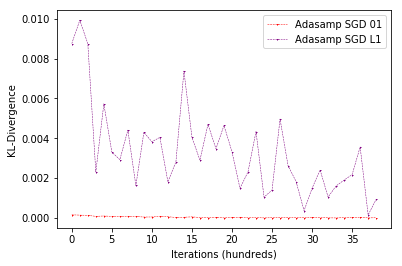

In [247]:
plt.plot(kl2, color='red', marker='+', linestyle='dashed',
        linewidth=0.5, markersize=1)
plt.plot(kl3, color='purple', marker='+', linestyle='dashed',
        linewidth=0.5, markersize=1)
plt.legend(('Adasamp SGD 01', 'Adasamp SGD L1', ('label1', 'label2')))
plt.xlabel('Iterations (hundreds)')
plt.ylabel('KL-Divergence')